In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from math import sqrt
from sklearn.metrics import roc_auc_score, f1_score, classification_report, confusion_matrix
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, classification_report
from keras.models import Sequential, Model 
from keras.layers import Dense, Input, concatenate, Activation, Dropout
from keras.optimizers import Adam
from tensorflow import set_random_seed
from keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from micromlgen import port

Using TensorFlow backend.


In [30]:
def printConfusionMatrix(cm, labels, title=""):

    df_cm = pd.DataFrame(cm, labels, labels)
    sn.set(rc={'figure.figsize':(10,7)})
    sn.set(font_scale=1.4) # for label size
    ax = sn.heatmap(df_cm, annot=True, fmt='d', annot_kws={"size": 16})
    ax.set_title(title)
    ax.set(xlabel='Predicted Labels', ylabel='Real Labels')


    pyplot.show()

In [3]:
RANDOM_SEED = 42

In [4]:
np.random.seed(RANDOM_SEED)
set_random_seed(RANDOM_SEED)

In [18]:
with open('data/X-all.pkl', 'rb') as f:
    X = pickle.load(f)

with open('data/y-all.pkl', 'rb') as f:
    y = pickle.load(f)

In [19]:
X.shape

(3900, 60)

Split in train and test sets

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_SEED)

In [21]:
#y_train = pd.get_dummies(y_train).values
#y_test = pd.get_dummies(y_test).values

In [22]:
y_train

array([3, 4, 2, ..., 1, 1, 3])

In [23]:
X_train.shape[1]

60

## Models Evaluation

### RF

In [24]:
model = RandomForestClassifier(n_estimators=50, random_state=42)
#model = MLPClassifier(random_state=42)

In [25]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
y_pred = model.predict(X_test)

In [27]:
f1_score(y_test, y_pred, average="weighted")

0.991029277814238

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       156
           1       0.99      1.00      1.00       156
           2       1.00      0.99      1.00       156
           3       0.99      0.97      0.98       156
           4       0.97      0.99      0.98       156

    accuracy                           0.99       780
   macro avg       0.99      0.99      0.99       780
weighted avg       0.99      0.99      0.99       780



In [29]:
print(confusion_matrix(y_test, y_pred))

[[155   1   0   0   0]
 [  0 156   0   0   0]
 [  0   0 155   1   0]
 [  0   0   0 152   4]
 [  0   0   0   1 155]]


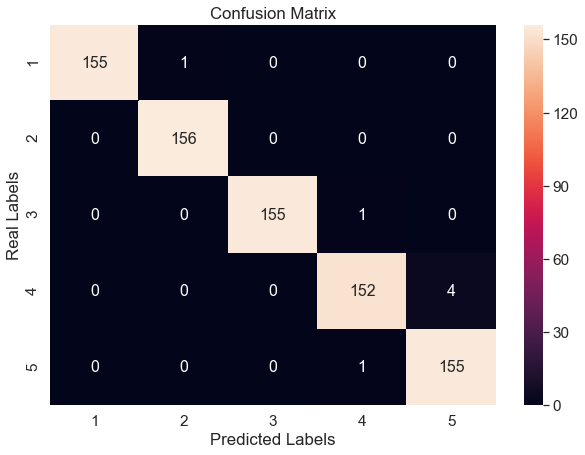

In [31]:
labels = [x for x in range(1,6)]
printConfusionMatrix(confusion_matrix(y_test, y_pred), labels, "Confusion Matrix")

In [28]:
with open('rf_model_paper_3.h', 'w') as f:  # change path if needed
    f.write(port(model, optimize=False))

In [49]:
with open('models/rf_model_paper_3.pkl', 'wb') as f:
    pickle.dump(model, f)


### MLP

In [40]:
# design network

model = Sequential()
model.add(Dense(5, activation='relu', input_dim=5))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [41]:
opt = Adam(lr=1e-5, decay=1e-5)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [42]:
# fit network
history = model.fit(x=X_train, y=y_train, epochs=100, batch_size=16, validation_split=0.25, verbose=1, shuffle=True)

W0601 16:05:46.184884  2508 deprecation_wrapper.py:119] From C:\Users\giova\AppData\Roaming\Python\Python36\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 840 samples, validate on 280 samples
Epoch 1/100
840/840 [==============================] - 0s 527us/step - loss: 4.7718 - acc: 0.1440 - val_loss: -32.9666 - val_acc: 0.1464
Epoch 2/100
840/840 [==============================] - 0s 82us/step - loss: -31.5242 - acc: 0.1417 - val_loss: -32.9666 - val_acc: 0.1464
Epoch 3/100
840/840 [==============================] - 0s 77us/step - loss: -31.5242 - acc: 0.1417 - val_loss: -32.9666 - val_acc: 0.1464
Epoch 4/100
840/840 [==============================] - 0s 83us/step - loss: -31.5242 - acc: 0.1417 - val_loss: -32.9666 - val_acc: 0.1464
Epoch 5/100
840/840 [==============================] - 0s 77us/step - loss: -31.5242 - acc: 0.1417 - val_loss: -32.9666 - val_acc: 0.1464
Epoch 6/100
840/840 [==============================] - 0s 80us/step - loss: -31.5242 - acc: 0.1417 - val_loss: -32.9666 - val_acc: 0.1464
Epoch 7/100
840/840 [==============================] - 0s 75us/step - loss: -31.5242 - acc: 0.1417 - val_loss: -32.9666 - val_a

In [89]:
model.save('models/rnn-cnn')

In [ ]:
with open('models/rnn-cnn-history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [ ]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

In [187]:
# make a prediction
y_pred = model.predict(X_test)

In [188]:
np.argmax(y_pred, axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [101]:
f1_score(y_test, np.argmax(y_pred, axis=1), average="weighted")

AxisError: axis 1 is out of bounds for array of dimension 1

In [81]:
print(classification_report(y_test, np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        20
           2       0.00      0.00      0.00        20
           3       0.17      1.00      0.29        20
           4       0.00      0.00      0.00        20
           5       0.00      0.00      0.00        20

    accuracy                           0.17       119
   macro avg       0.03      0.17      0.05       119
weighted avg       0.03      0.17      0.05       119



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [84]:
print(confusion_matrix(y_test, y_pred.argmax(axis=1)))

[[ 0  0  0 19  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0 20  0  0]]
